In [1]:
# Importa pandas para análisis de datos con el alias pd
# Se importa la biblioteca pandas y se le asigna el alias 'pd'.
# Pandas se usa principalmente para manipulación y análisis de estructuras de datos.
import pandas as pd
# Importa numpy para cálculos numéricos con el alias np
# Se importa la biblioteca numpy con el alias 'np'.
# Numpy es útil para operaciones numéricas y manejo de arrays.
import numpy as np

In [2]:
# Lee el archivo CSV y lo guarda como un DataFrame
# Se lee un archivo CSV que contiene datos del estudio de Framingham.
# El resultado se guarda en un DataFrame llamado 'df'.
df = pd.read_csv('./data/framingham.csv')
# Muestra las primeras 5 filas del DataFrame
# Se muestran las primeras 5 filas del DataFrame 'df' para una vista preliminar de los datos.
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Muestra las dimensiones del DataFrame (filas, columnas)
# Se consulta la forma del DataFrame, que devuelve una tupla con el número de filas y columnas.
df.shape

(4240, 16)

In [4]:
# Cuenta la cantidad de valores nulos (NaN) por columna en el DataFrame
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# Cuenta cuántas filas tienen al menos un valor nulo
df.isna().any(axis=1).sum()

np.int64(582)

In [6]:
# Muestra el tipo de dato de cada columna del DataFrame
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
# Muestra estadísticas descriptivas para las columnas numéricas
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# Importa bibliotecas para visualización de datos
# %matplotlib inline permite mostrar los gráficos dentro del notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

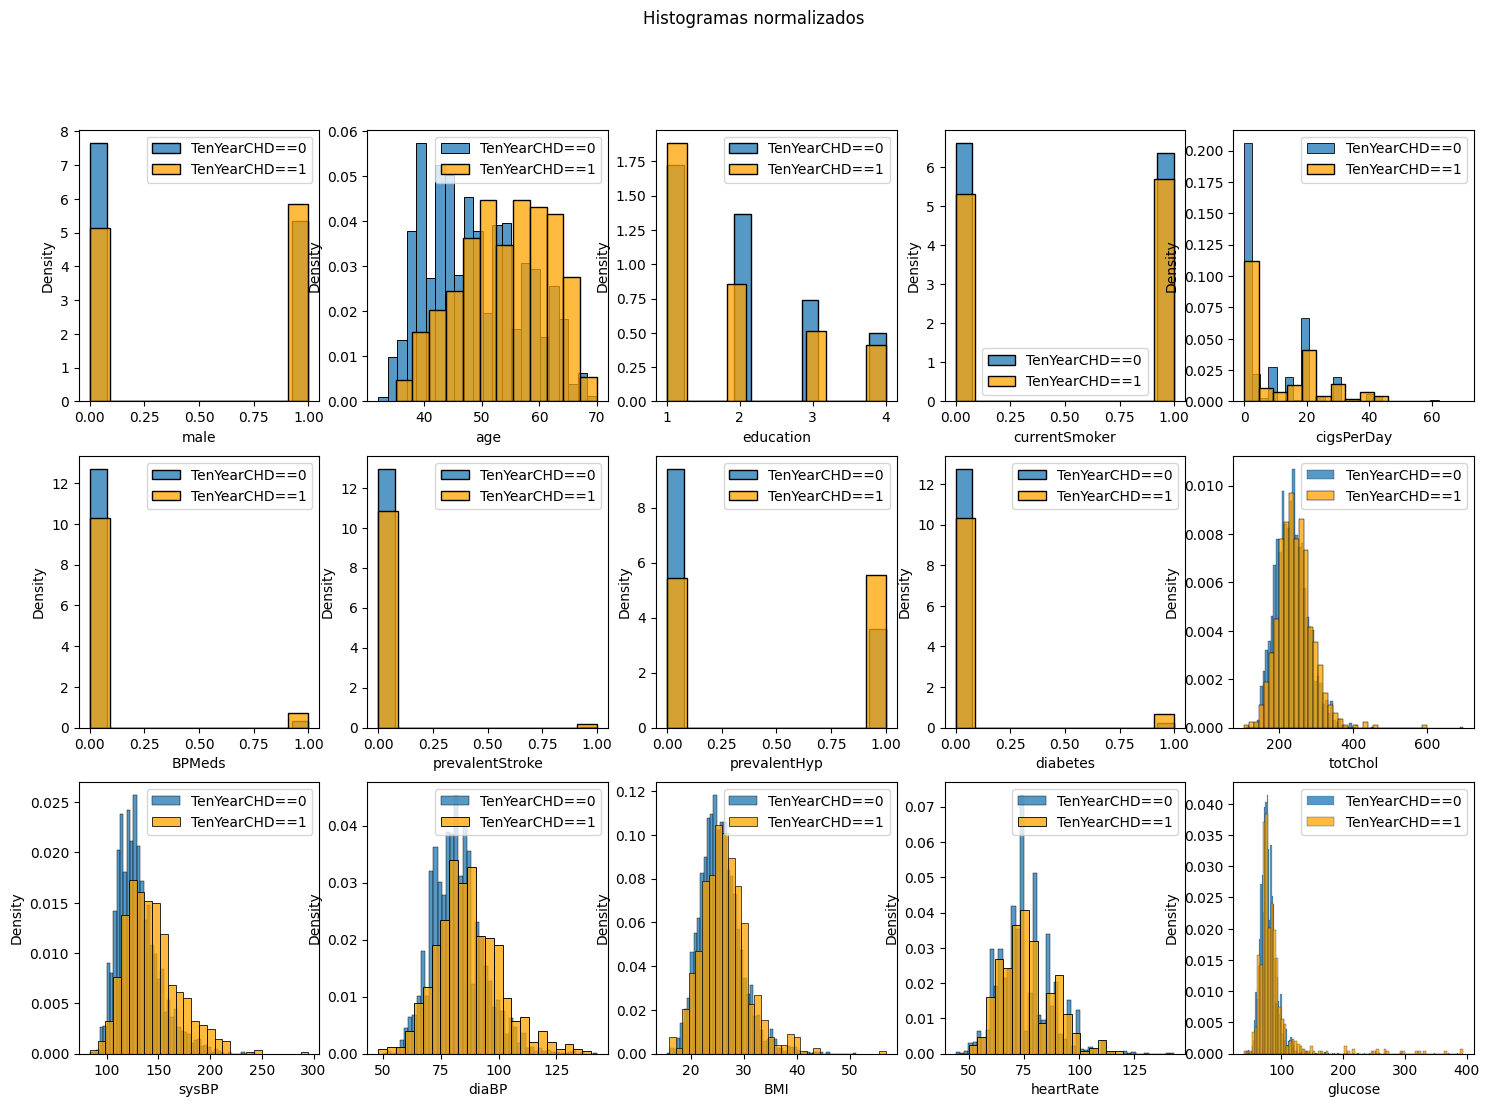

In [9]:
# Crea histogramas normalizados para cada variable del dataset, comparando los casos con y sin enfermedad cardíaca a 10 años
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 12))
fig.suptitle("Histogramas normalizados")
for c, ax in zip(df.columns[:-1], axes.flatten()):
    sns.histplot(data=df.loc[df['TenYearCHD']==0,c].dropna(),stat='density', ax=ax,kde=False)
    sns.histplot(data=df.loc[df['TenYearCHD']==1,c].dropna(),stat='density', ax=ax, kde=False, color='orange')
    ax.legend(['TenYearCHD==0','TenYearCHD==1'])

<Axes: >

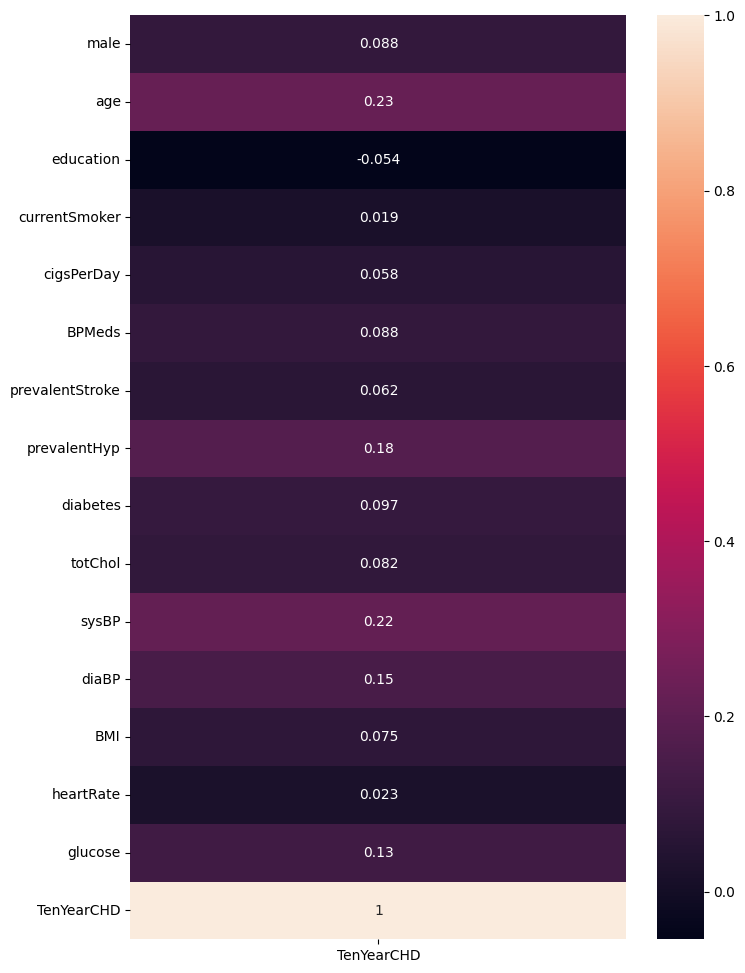

In [10]:
# Muestra una matriz de correlación centrada en la variable objetivo 'TenYearCHD'
plt.figure(figsize=(8,12))
sns.heatmap(df.corr()[['TenYearCHD']], annot=True)

In [11]:
# Elimina las filas con valores nulos del DataFrame original
df.dropna(inplace=True)

In [12]:
# Separa las variables independientes (X) y la variable objetivo (y)
X=df.drop(columns=['TenYearCHD'])
y=df['TenYearCHD']

In [13]:
# Importa la función para dividir los datos en entrenamiento y prueba
# Se importa la función 'train_test_split' desde sklearn.model_selection.
# Esta función se usa para dividir el conjunto de datos en entrenamiento y prueba.
from sklearn.model_selection import train_test_split
# Divide los datos en conjuntos de entrenamiento y prueba
# Se realiza la división del conjunto de datos en características (X) y etiquetas (y).
# Luego se separan en subconjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0)

In [14]:
# Muestra la proporción de casos positivos (media) en el conjunto de entrenamiento y prueba
y_train.mean(), y_test.mean()

(np.float64(0.15238789646372586), np.float64(0.15191256830601094))

In [15]:
# Estandariza las variables: les quita la media y las divide por su desviación estándar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [16]:
# Importa el modelo de Regresión Logística de sklearn
# Se importa el modelo de Regresión Logística desde sklearn.
# Este modelo se utiliza comúnmente para problemas de clasificación binaria.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Entrena el modelo con los datos de entrenamiento
# Se entrena (ajusta) el modelo usando los datos de entrenamiento.
lr.fit(X_train_std, y_train)

LogisticRegression()

In [17]:
# Calcula la precisión del modelo comparando predicciones con valores reales
# Se importa la función 'accuracy_score' que mide la precisión del modelo.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
# Realiza predicciones con el modelo entrenado
# Se realizan predicciones con el modelo entrenado sobre el conjunto de prueba.
accuracy_score(y_train, lr.predict(X_train_std))

0.8541742617572001

Text(50.722222222222214, 0.5, 'Reales')

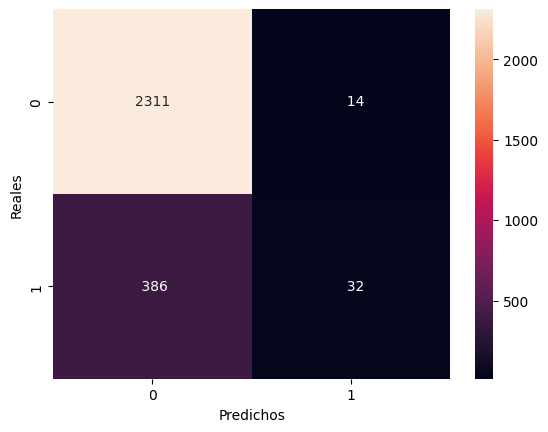

In [19]:
# Realiza predicciones con el modelo entrenado
# Se realizan predicciones con el modelo entrenado sobre el conjunto de prueba.
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [20]:
# Obtiene las probabilidades predichas por el modelo para la clase positiva (CHD = 1) en los ejemplos con y = 0
lr.predict_proba(X_train_std[y_train==0])[:,1]

array([0.1301531 , 0.02634554, 0.03497721, ..., 0.05827697, 0.24504377,
       0.17333501], shape=(2325,))

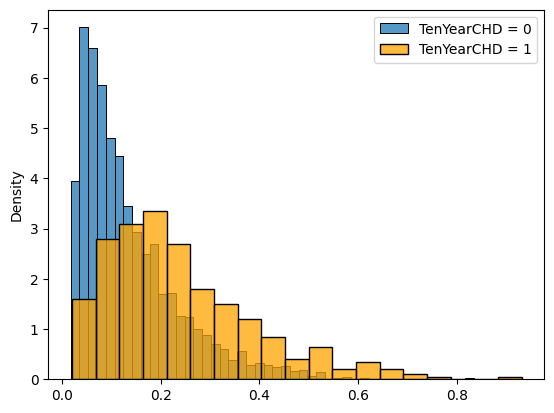

In [21]:
# Grafica la distribución de probabilidades predichas para cada clase (0 y 1) usando histogramas
sns.histplot(data=lr.predict_proba(X_train_std[y_train==0])[:,1],stat='density')
sns.histplot(data=lr.predict_proba(X_train_std[y_train==1])[:,1],stat='density', color='orange')
ylim = plt.ylim()
plt.legend(['TenYearCHD = 0', 'TenYearCHD = 1'])

In [22]:
# Define un umbral de decisión personalizado para convertir probabilidades en clases predichas
umbral = 0.2
probs = lr.predict_proba(X_train_std)[:,1]
y_pred_train = probs > umbral

In [23]:
# Calcula la precisión del modelo comparando predicciones con valores reales
# Se calcula la precisión del modelo comparando las predicciones con las etiquetas reales.
accuracy_score(y_train, y_pred_train)

0.7535545023696683

Text(50.722222222222214, 0.5, 'Reales')

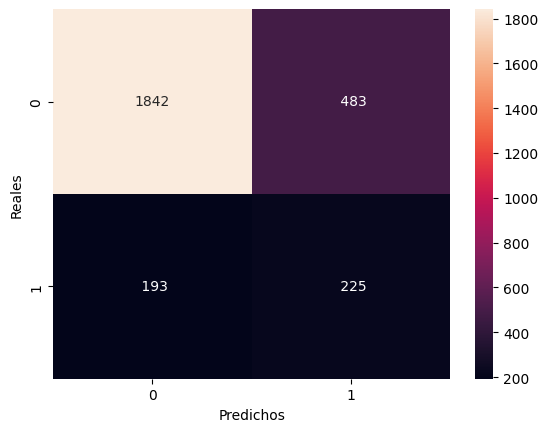

In [24]:
# Muestra una matriz de confusión con los valores reales vs. predichos en entrenamiento
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')